# Гордионок, Сайгакова, Борков М8О-209Б-19

## Задание: Реализовать обсуждённый на занятии класс FuncAnalysis. Реализовать функции поиска и построения кривых, отвечающих F=0 (линия типа корень), F=-1 (линия типа минимум), F=1 (линия типа максимум).

## $$ F = sin(x + sin(y) + 0.1 * y^2 - 0.8 $$
## $$ x = 0 .. 10, y = 0 .. 10 $$

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mpl`ot3d import Axes3D
from scipy.optimize import root
import copy
%matplotlib inline
# если зохотите повертеть 3д график, то замените inline на notebook

In [9]:
class FuncAnalysis:
    F, xlim, ylim = None, None, None
    
    def __init__(self, F, xlim, ylim):
        self.F = F
        self.xlim = xlim
        self.ylim = ylim
        
        
    def der_x(self, f, x):
        eps = 0.0001
        return (f(x + eps) - f(x)) / eps

    def our_max(self, f, x0, step=0.2, eps=0.0001, i=1000):
        x = x0
        while i and abs(f(x)) > eps:
            x += self.der_x(f, x) * step
            i -= 1

        return x

    def our_min(self, f, x0, step=0.2, eps=0.0001, i=1000):
        x = x0
        while i and abs(f(x)) > eps:
            x -= self.der_x(f, x) * step
            i -= 1

        return x 

    def our_root(self, f, x0):
        return root(f, x0).x[0] 

    def plot3D(self):
        x, y = np.meshgrid(np.linspace(self.xlim[0], self.xlim[1], 100), np.linspace(self.ylim[0], self.ylim[1], 100))

        z = self.F(x, y)
      
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.plot_surface(x, y, z, cmap='inferno')
        
    def findPointsForCurves(self):
        max_point = []
        min_point = []
        root_point = []
        
        # чтобы во всей функции не добавлять self.
        xlim = self.xlim 
        ylim = self.ylim
        F = self.F
        
        for x in np.linspace(xlim[0], xlim[1], 10):
            f = lambda x: F(x, ylim[0])

            point = round(self.our_max(f, x), 6)
            if not [point, ylim[0]] in max_point and 0 <= point <= 10:
                max_point.append([point, ylim[0]])
            point = round(self.our_min(f, x), 6)
            if not [point, ylim[0]] in min_point and 0 <= point <= 10:
                min_point.append([point, ylim[0]])
            point = round(root(f, x).x[0], 6)
            if not [point, ylim[0]] in root_point and 0 <= point <= 10:
                root_point.append([point, ylim[0]])

            f = lambda x: F(x, ylim[1])

            point = round(self.our_max(f, x), 6)
            if not [point, ylim[1]] in max_point and 0 <= point <= 10:
                max_point.append([point, ylim[1]])
            point = round(self.our_min(f, x), 6)
            if not [point, ylim[1]] in min_point and 0 <= point <= 10:
                min_point.append([point, ylim[1]])
            point = round(root(f, x).x[0], 6)
            if not [point, ylim[1]] in root_point and 0 <= point <= 10:
                root_point.append([point, ylim[1]])

        for y in np.linspace(ylim[0], ylim[1], 10):
            f = lambda y: F(xlim[0], y)

            point = round(self.our_max(f, y), 6)
            if not [xlim[0], point] in max_point and 0 <= point <= 10:
                max_point.append([xlim[0], point])
            point = round(self.our_min(f, y), 6)
            if not [xlim[0], point] in min_point and 0 <= point <= 10:
                min_point.append([xlim[0], point])
            point = round(root(f, y).x[0], 6)
            if not [xlim[0], point] in root_point and 0 <= point <= 10:
                root_point.append([xlim[0], point])

            f = lambda y: F(xlim[1], y)

            point = round(self.our_max(f, y), 6)
            if not [xlim[1], point] in max_point and 0 <= point <= 10:
                max_point.append([xlim[1], point])
            point = round(self.our_min(f, y), 6)
            if not [xlim[1], point] in min_point and 0 <= point <= 10:
                min_point.append([xlim[1], point])
            point = round(root(f, y).x[0], 6)
            if not [xlim[1], point] in root_point and 0 <= point <= 10:
                root_point.append([xlim[1], point])

        s = -float('inf')
        for point in max_point:
            s = F(point[0], point[1]) if F(point[0], point[1]) > s else s

        i = 0
        while i < len(max_point):
            p = max_point[i]
            if F(p[0], p[1]) + 0.001 < s:
                max_point.pop(i)
            else:
                i += 1

        s = float('inf')
        for point in min_point:
            s = F(point[0], point[1]) if F(point[0], point[1]) < s else s

        i = 0
        while i < len(min_point):
            p = min_point[i]
            if F(p[0], p[1]) - 0.001 > s:
                min_point.pop(i)
            else:
                i += 1

        while i < len(root_point):
            p = root_point[i]
            if abs(F(p[0], p[1])) > 0.0001:
                root_point.pop(i)
            else:
                i += 1
                
        return max_point, min_point, root_point
        
    def findCurves(self, F, ourF, list_points):   
        # чтобы во всей функции не добавлять self.
        xlim = self.xlim 
        ylim = self.ylim
        F = self.F
        
        curves = []
        list_points = copy.deepcopy(list_points)
        while len(list_points) > 0:
            curve = []
            point = list_points.pop()

            curve.append(point)
            if point[0] == 0:
                phi = 0
            elif point[0] == 10:
                phi = np.pi
            elif point[1] == 0:
                phi = np.pi/2
            else:
                phi = -np.pi/2

            f = lambda phi: F(point[0] + np.cos(phi)/4, point[1] + np.sin(phi)/4)
            new_phi = ourF(f, phi)
            point = [point[0] + np.cos(new_phi)/4, point[1] + np.sin(new_phi)/4]

            while 0 <= point[0] <= 10 and 0 <= point[1] <= 10:
                p2, p1 = point, curve[len(curve) - 1]

                phi = np.arctan2(p2[1] - p1[1], p2[0] - p1[0])
                curve.append(point)
                f = lambda phi: F(point[0] + np.cos(phi)/4, point[1] + np.sin(phi)/4)
                new_phi = ourF(f, phi)
                point = [point[0] + np.cos(new_phi)/4, point[1] + np.sin(new_phi)/4]

            l = lambda p1, p2: np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
            minl = float('inf')
            mini = -1
            for i in range(len(list_points)):
                p = list_points[i]
                if l(point, p) < minl:
                    minl = l(point, p)
                    mini = i

            curve.append(list_points.pop(mini))
            curves.append(np.array(curve))

        return curves
    
    def plotCurves(self):
        max_point, min_point, root_point = self.findPointsForCurves()
        
        fig, ax = plt.subplots()
        
        for curve in self.findCurves(self.F, self.our_max, max_point):
            line1, = ax.plot(curve[:,0], curve[:,1], c='r', label='Максимумы')

        for curve in self.findCurves(self.F, self.our_min, min_point):
            line2, = ax.plot(curve[:,0], curve[:,1], c='g', label='Минимумы')

        for curve in self.findCurves(self.F, self.our_root, root_point):
            line3, = ax.plot(curve[:,0], curve[:,1], c='b', label='Корни')

        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.legend((line1, line2, line3), ['Максимумы', 'Минимумы', 'Корни'])
    
    

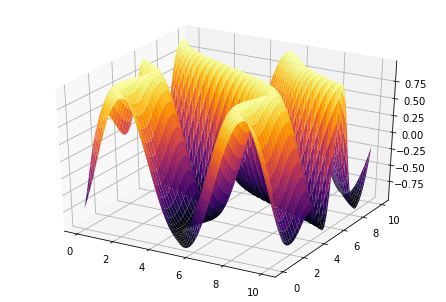

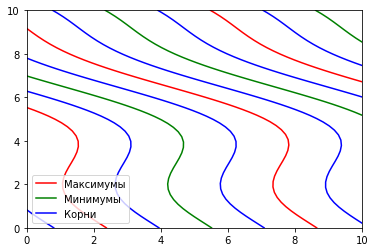

In [10]:
F = lambda x, y: np.sin(x + np.sin(y) + 0.1*y**2 - 0.8)
xlim = [0, 10]
ylim = [0, 10]

a = FuncAnalysis(F, xlim, ylim)
a.plot3D()
a.plotCurves()